## STOCK DATA PREPROCESSING

In this notebook, stock data will be preprocessed and visualized.

In [15]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's first take a look at the raw data

In [16]:
#Load data
stock = pd.read_csv('AALStock.csv')
print(stock)

      Unnamed: 0   TimeKey   Open  Close   High    Low    Volume
0              0  20170103  47.28  46.30  47.34  46.14   6737800
1              1  20170104  46.63  46.70  47.44  46.35   5859600
2              2  20170105  46.52  45.89  46.93  45.61   6825300
3              3  20170106  45.85  46.21  46.72  45.47   7260200
4              4  20170109  46.01  47.08  47.34  45.78   4739100
...          ...       ...    ...    ...    ...    ...       ...
1000        1000  20201224  16.04  15.66  16.04  15.53  29393443
1001        1001  20201228  15.97  16.06  16.46  15.91  56629125
1002        1002  20201229  16.32  15.86  16.41  15.75  49187272
1003        1003  20201230  15.85  16.15  16.20  15.72  47919183
1004        1004  20201231  16.08  15.77  16.09  15.63  56555621

[1005 rows x 7 columns]


There is an unused column

In [17]:
#Delete first column
cols = list(stock.columns.values)
stock = stock[cols[1:]]
print(stock)

       TimeKey   Open  Close   High    Low    Volume
0     20170103  47.28  46.30  47.34  46.14   6737800
1     20170104  46.63  46.70  47.44  46.35   5859600
2     20170105  46.52  45.89  46.93  45.61   6825300
3     20170106  45.85  46.21  46.72  45.47   7260200
4     20170109  46.01  47.08  47.34  45.78   4739100
...        ...    ...    ...    ...    ...       ...
1000  20201224  16.04  15.66  16.04  15.53  29393443
1001  20201228  15.97  16.06  16.46  15.91  56629125
1002  20201229  16.32  15.86  16.41  15.75  49187272
1003  20201230  15.85  16.15  16.20  15.72  47919183
1004  20201231  16.08  15.77  16.09  15.63  56555621

[1005 rows x 6 columns]


Type check

In [20]:
stock.dtypes

TimeKey      int64
Open       float64
Close      float64
High       float64
Low        float64
Volume       int64
dtype: object

TimeKey column should be in type datetime

In [26]:
#Change into type datetime in the format yyyy-mm-dd 
stock.iloc[:,0] = pd.to_datetime(stock.iloc[:,0],format='%Y%m%d')

Now we can take a look at the curve of stock price, closing price is used

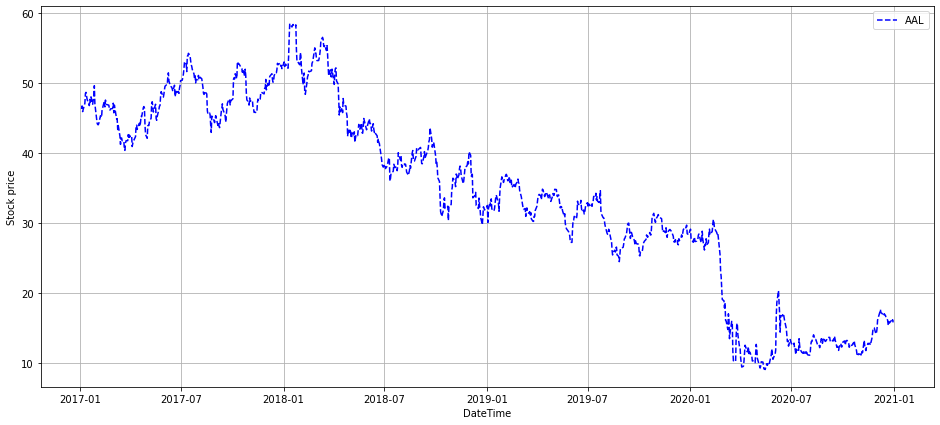

In [42]:
#Use painter in matplotlib
plt.figure(figsize=(16, 7))
plt.plot(stock.iloc[:,0],stock.iloc[:,2],label='AAL',linestyle='--',  c='b')
plt.xlabel('DateTime')
plt.ylabel('Stock price')
plt.grid()
plt.legend()
plt.show()

Another important figure is the volume, the numbers are large and will be normalized later

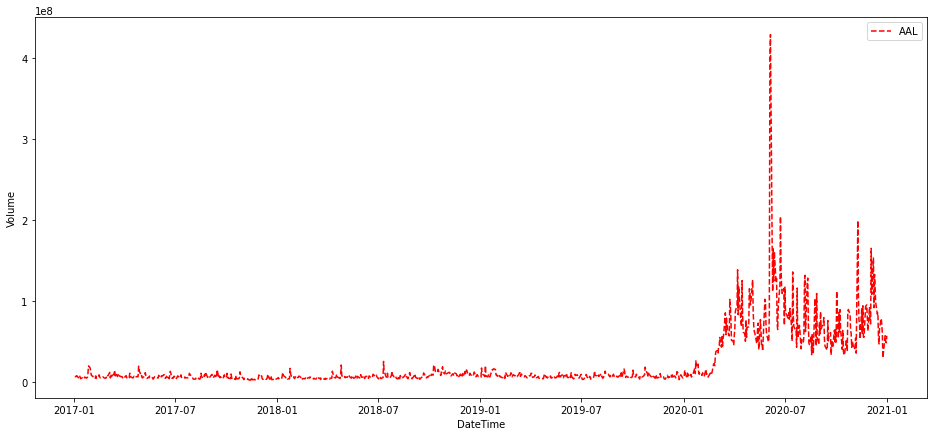

In [34]:
plt.figure(figsize=(16, 7))
plt.plot(stock.iloc[:,0],stock.iloc[:,5],label='AAL',linestyle='--',  c='r')
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.legend()
plt.show()

That value over 4 is an outlier, boxplot is not used since there is a great discrepancy before and after 2020-02, but we can't treat all the data after Feburary as outliers

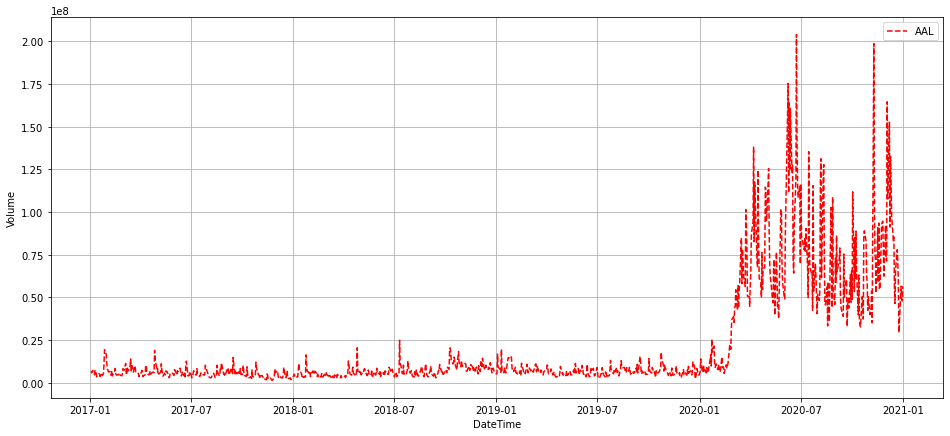

In [43]:
#Outlier elimination
stock_filtered = stock.loc[stock['Volume']<300000000]
plt.figure(figsize=(16, 7))
plt.plot(stock_filtered.iloc[:,0],stock_filtered.iloc[:,5],label='AAL',linestyle='--',  c='r')
plt.xlabel('DateTime')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

Next is a figure which I believe is important, the fluctuation of the stock price

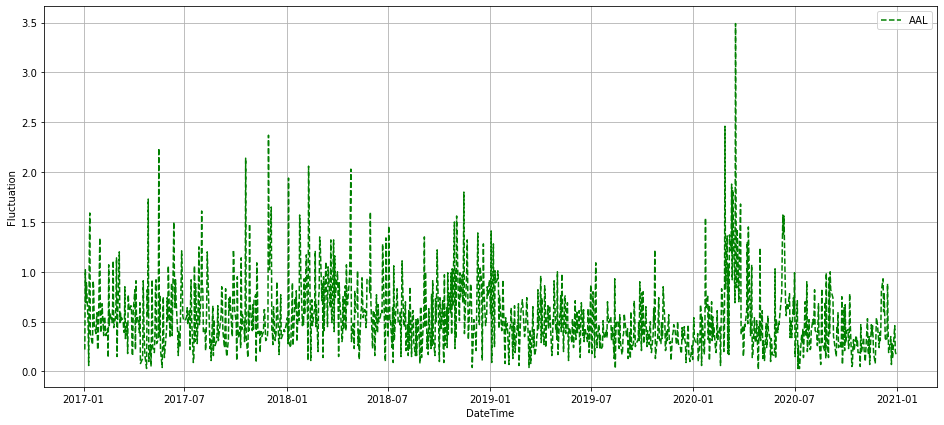

In [54]:
#Fluctuation is calculated by (High - Low)-(abs(Open-Close))
stock_filtered['Fluctuation'] = stock_filtered['High']-stock_filtered['Low']-(abs(stock_filtered['Open']-stock_filtered['Close']))
plt.figure(figsize=(16, 7))
plt.plot(stock_filtered.iloc[:,0],stock_filtered.iloc[:,6],label='AAL',linestyle='--',  c='g')
plt.xlabel('DateTime')
plt.ylabel('Fluctuation')
plt.grid()
plt.legend()
plt.show()

Growth is the difference of consecutive closing stock price, the initial value on 2017-01-03 is set at 0.

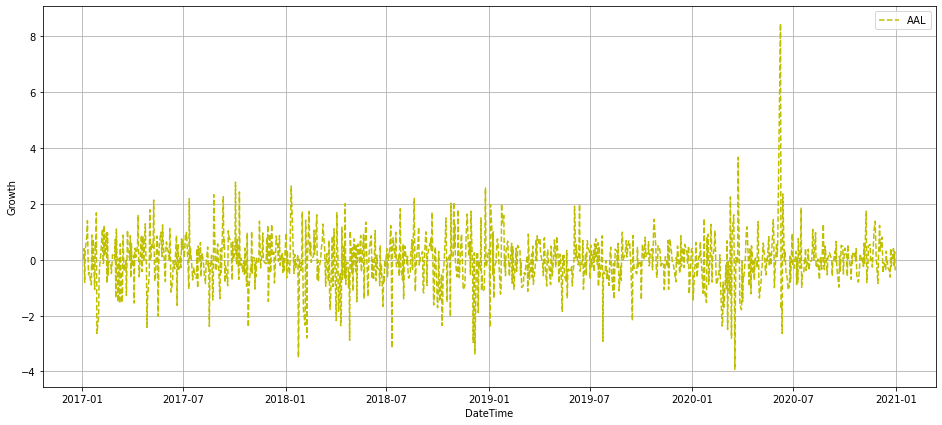

In [58]:
#Growth
stock_filtered['Growth'] = stock_filtered['Close']
for i in range(stock_filtered.shape[0]-1):
    stock_filtered.iloc[i+1,7] = stock_filtered.iloc[i+1,7]-stock_filtered.iloc[i,2]
stock_filtered.iloc[0,7] = 0 
plt.figure(figsize=(16, 7))
plt.plot(stock_filtered.iloc[:,0],stock_filtered.iloc[:,7],label='AAL',linestyle='--',  c='y')
plt.xlabel('DateTime')
plt.ylabel('Growth')
plt.grid()
plt.legend()
plt.show()

In [59]:
#Store the processed stock data into csv. file
stock_filtered.to_csv('AALStock_processed.csv', index=False, header=True)